In [1]:
import sys
sys.path.append('../src')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import tensorflow as tf
from gait.config import pd
from gait.utils import get_data_by_overlap_percent,get_overlap_data_all_sessions,  split_test_train_by_subjects, remove_invalid_data, get_overlap_data_all_sessions
from gait.training import train_model
from gait.evalution import save_history, save_test_history, save_accuracy_loss_figure, save_confusion_matrix_figure, compute_validations_predictions

In [2]:
def compute_resultant_acceleration(X):
    return np.sqrt(X[:,:,0] **2 + X[:,:,1] ** 2 + X[:,:,2] ** 2)

def compute_resultant_gyro(X):
    return np.sqrt(X[:,:,3] **2 + X[:,:,4] ** 2 + X[:,:,5] ** 2)

def compute_resultant_angle(X):
    return np.sqrt(X[:,:,6] **2 + X[:,:,7] ** 2 + X[:,:,8] ** 2)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
?????????variant_here
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:local

/home/sanjeev/.local/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1998/1998 [==============================] - 30s 12ms/step - loss: 0.8071 - accuracy: 0.6884 - val_loss: 1.0681 - val_accuracy: 0.6271
Epoch 2/100
1998/1998 [==============================] - 22s 11ms/step - loss: 0.6392 - accuracy: 0.7635 - val_loss: 0.7580 - val_accuracy: 0.7361
Epoch 3/100
1998/1998 [==============================] - 22s 11ms/step - loss: 0.5634 - accuracy: 0.7967 - val_loss: 0.8116 - val_accuracy: 0.7459
Epoch 4/100
1998/1998 [==============================] - 23s 12ms/step - loss: 0.5040 - accuracy: 0.8170 - val_loss: 0.7251 - val_accuracy: 0.7732
Epoch 5/100
1998/1998 [==============================] - 22s 11ms/step - loss: 0.4589 - accuracy: 0.8362 - val_loss: 0.6633 - val_accuracy: 0.7649
Epoch 6/100
1998/1998 [==============================] - 22s 11ms/step - loss: 0.4328 - accuracy: 0.8483 - val_loss: 0.6726 - val_accuracy: 0.7870
Epoch 7/100
1998/1998 [==============================] - 22s 11ms/step - loss: 0.4021 - accuracy: 0.8590 - val_loss: 0

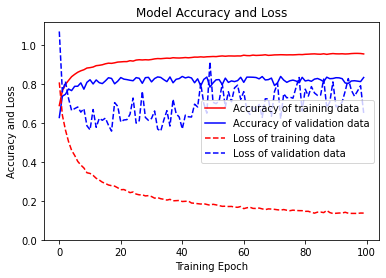

INFO:tensorflow:Error reported to Coordinator: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, None, 32, 12), found shape=(None, 128, 12)
Traceback (most recent call last):
  File "/home/sanjeev/.local/lib/python3.9/site-packages/tensorflow/python/training/coordinator.py", line 293, in stop_on_exception
    yield
  File "/home/sanjeev/.local/lib/python3.9/site-packages/tensorflow/python/distribute/mirrored_run.py", line 342, in run
    self.main_result = self.main_fn(*self.main_args, **self.main_kwargs)
  File "/home/sanjeev/.local/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 689, in wrapper
    return converted_call(f, args, kwargs, options=options)
  File "/home/sanjeev/.local/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 377, in converted_call
    return _call_unconverted(f, args, kwargs, options)
  File "/home/sanjeev/.local/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api

ValueError: in user code:

    File "/home/sanjeev/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/sanjeev/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sanjeev/anaconda3/envs/thesis/lib/python3.9/site-packages/six.py", line 719, in reraise
        raise value
    File "/home/sanjeev/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/sanjeev/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/sanjeev/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/sanjeev/.local/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, None, 32, 12), found shape=(None, 128, 12)


In [3]:
overlapPercents = [50]
# overlapPercents = [0]
# exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', 'LLZjAPTyj7muHsEf',
#                     'MMuX9YIh4NTbLZLM', 'cbOZWnI7s1y8oLD4', 'PE8D53oX060qLbdX', 'xYdtS1F8tDyjEIgN', 'sUZBISq61Y7I5tqQ']
exclude_subjects = ['ddAeJA42PXvwthbW', 'nan', '0DXZFsYOfgqsYe0Z',
                    '0UXFxu10k0En1vDK',
                    'KNmC3LADpLyH5qJA',
                    'WAb2Ztvv2ux95P4Q',
                    'YbJVcb4vFFjKKlfe',
                    'ewpnQDEzR8hTqPRY',
                    'kPNKVxgIznp3Vskg',
                    'qyP4saGxcV9UfeQI', ]
for OVERLAP_PERCENT in overlapPercents:
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
    with strategy.scope():
        X, y, subjects = get_overlap_data_all_sessions(OVERLAP_PERCENT)
        # REMOVE UNWANTED SUBJECTS
        indexes = np.where(subjects == exclude_subjects)
        X = np.delete(X, indexes[0], axis=0)
        y = np.delete(y, indexes[0], axis=0)
        subjects = np.delete(subjects, indexes[0], axis=0)
        # END REMOVE UNWANTED SUBJECTS

        # AUGMENT DATA
        resultant_acc = compute_resultant_acceleration(X)
        resultant_gyro = compute_resultant_gyro(X)
        resultant_angle = compute_resultant_angle(X)
        resultant_acc = resultant_acc.reshape(
            resultant_acc.shape[0], resultant_acc.shape[1], 1)
        resultant_gyro = resultant_gyro.reshape(
            resultant_gyro.shape[0], resultant_gyro.shape[1], 1)
        resultant_angle = resultant_angle.reshape(
            resultant_angle.shape[0], resultant_angle.shape[1], 1)
        X = np.concatenate((X, resultant_acc), axis=2)
        X = np.concatenate((X, resultant_gyro), axis=2)
        X = np.concatenate((X, resultant_angle), axis=2)
        # AUGMENT DATA END

        # print('UNIQUE subjects:', np.unique(subjects))
        X_train, X_test, y_train, y_test, y_train_non_encoded, y_test_non_encoded = split_test_train_by_subjects(
            X, y, subjects, train_percent=0.8)

        model, history, evaluation_history = train_model(
            X_train, y_train, X_test, y_test, overlap_percent=OVERLAP_PERCENT, batch_size=16, epochs=100, variant="cnn_lstm")
        save_history(history, OVERLAP_PERCENT)
        save_test_history(evaluation_history, OVERLAP_PERCENT)
        save_accuracy_loss_figure(history, OVERLAP_PERCENT)
        validations, predictions = compute_validations_predictions(
            model, X_test, y_test)
        save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)


In [14]:
print(model)
print(X_test.shape)
n_steps, n_length = 4, 32
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, 12))
evaluation_history = model.evaluate(
    X_test, y_test, batch_size=16, verbose=1)


(17751, 4, 32, 12)
1110/1110 [==============================] - 8s 7ms/step - loss: 1.8178 - accuracy: 0.5940


In [15]:

validations, predictions = compute_validations_predictions(
            model, X_test, y_test)

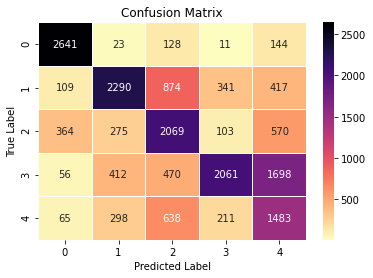

In [16]:
save_confusion_matrix_figure(
            validations, predictions, OVERLAP_PERCENT, sns)